# Data analises

In this notebook, we will study the data to see if (and how) the selected characteristics of the candidates are related to their grades in the diciplines evaluated by ENEM 2022.

In [1]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import pylab as pl
import numpy as np
from scipy import stats as stats

Here we import the csv fille data_DF

In [2]:
data_DF = pd.read_csv('data_DF.csv')
data_DF.head()

,NU_INSCRICAO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_ESCOLA,IN_TREINEIRO,Q001,Q002,Q006,Q025,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
0,210055243739,4,F,1,1,2,0,D,D,C,B,390.1,537.7,442.7,441.4,600.0
1,210055092856,2,F,1,3,2,0,D,E,E,B,564.0,581.3,604.5,590.4,780.0
2,210054977951,5,F,1,2,1,0,B,B,C,B,478.3,410.3,445.6,469.0,340.0
3,210055094382,2,F,1,1,1,1,C,D,B,B,483.0,487.3,501.4,540.0,0.0
4,210055092062,5,F,1,3,1,0,B,D,C,B,500.0,467.0,517.1,483.6,640.0


In [3]:
data_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44572 entries, 0 to 44571
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   NU_INSCRICAO     44572 non-null  int64  
 1   TP_FAIXA_ETARIA  44572 non-null  int64  
 2   TP_SEXO          44572 non-null  object 
 3   TP_ESTADO_CIVIL  44572 non-null  int64  
 4   TP_COR_RACA      44572 non-null  int64  
 5   TP_ESCOLA        44572 non-null  int64  
 6   IN_TREINEIRO     44572 non-null  int64  
 7   Q001             44572 non-null  object 
 8   Q002             44572 non-null  object 
 9   Q006             44572 non-null  object 
 10  Q025             44572 non-null  object 
 11  NU_NOTA_CN       44572 non-null  float64
 12  NU_NOTA_CH       44572 non-null  float64
 13  NU_NOTA_LC       44572 non-null  float64
 14  NU_NOTA_MT       44572 non-null  float64
 15  NU_NOTA_REDACAO  44572 non-null  float64
dtypes: float64(5), int64(6), object(5)
memory usage: 5.4+ MB


We make a new dataframe with the grades of the students and calculate its most relevant statistics:

In [4]:
data_DF_notas = data_DF[['NU_NOTA_CN', 'NU_NOTA_MT', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_REDACAO']]
data_DF_notas.describe()

,NU_NOTA_CN,NU_NOTA_MT,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_REDACAO
count,44572.000000,44572.000000,44572.000000,44572.000000,44572.000000
mean,511.484434,558.837557,547.617504,541.665593,643.046307
std,78.305263,123.431483,81.283654,74.158996,193.763688
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,450.100000,459.800000,496.800000,496.800000,560.000000
50%,502.150000,547.700000,550.900000,549.100000,640.000000
75%,565.500000,641.800000,603.000000,593.600000,780.000000
max,857.400000,983.200000,817.700000,797.000000,1000.000000


It's also relevant to see the distribution of grades in a histogram. In general we can see that the variables NU_NOTA_CN (Natural Sciences grade), NU_NOTA_CH (Human Sciences grade), NU_NOTA_LC (Langlages grade), NU_NOTA_MT (Math grade) have distributions that aproximate gaussian distributions, althoug, they present some positive or negative skew, they also present outliers. On the other hand, NU_NOTA_REDACAO (Writing grade) presents a very incomum shape that we can't classify as gaussian or uniform.

Text(0, 0.5, 'Frequency')

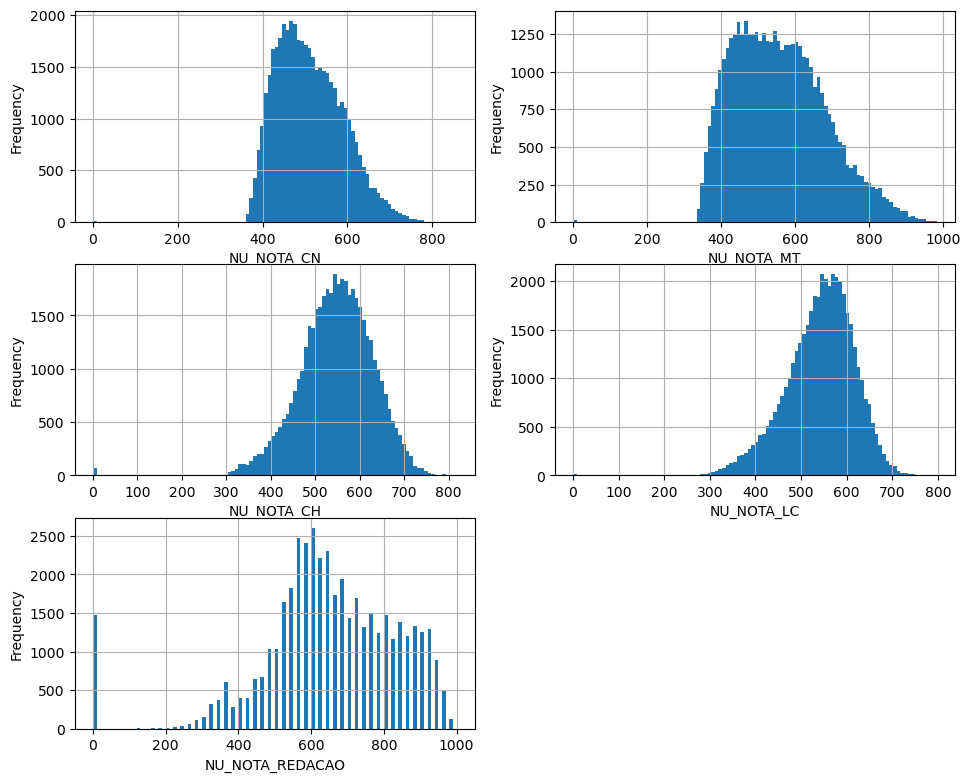

In [5]:
fig = plt.figure()
plt.subplots_adjust(bottom=0.005, right=1.5, top=1.5)

plt.subplot(3, 2, 1)
data_DF_notas['NU_NOTA_CN'].hist(bins=100)
plt.xlabel('NU_NOTA_CN', fontsize = 10)
plt.ylabel('Frequency', fontsize = 10)

plt.subplot(3, 2, 2)
data_DF_notas['NU_NOTA_MT'].hist(bins=100)
plt.xlabel('NU_NOTA_MT', fontsize = 10)
plt.ylabel('Frequency', fontsize = 10)

plt.subplot(3, 2, 3)
data_DF_notas['NU_NOTA_CH'].hist(bins=100)
plt.xlabel('NU_NOTA_CH', fontsize = 10)
plt.ylabel('Frequency', fontsize = 10)

plt.subplot(3, 2, 4)
data_DF_notas['NU_NOTA_LC'].hist(bins=100)
plt.xlabel('NU_NOTA_LC', fontsize = 10)
plt.ylabel('Frequency', fontsize = 10)

plt.subplot(3, 2, 5)
data_DF_notas['NU_NOTA_REDACAO'].hist(bins=100)
plt.xlabel('NU_NOTA_REDACAO', fontsize = 10)
plt.ylabel('Frequency', fontsize = 10)

In [6]:
sns.set()
def plot_variable(variable):
    fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12,15))

    freq =data_DF.groupby([variable]).NU_INSCRICAO.count()
    sns.barplot(x=freq.index , y=freq, ax=axes[0,0])

    sns.boxplot(data=data_DF, x=data_DF[variable], y=data_DF['NU_NOTA_CN'], ax=axes[0,1])
    
    sns.boxplot(data=data_DF, x=data_DF[variable], y=data_DF['NU_NOTA_MT'], ax=axes[1,0])
    
    sns.boxplot(data=data_DF, x=data_DF[variable], y=data_DF['NU_NOTA_CH'], ax=axes[1,1])
    
    sns.boxplot(data=data_DF, x=data_DF[variable], y=data_DF['NU_NOTA_LC'], ax=axes[2,0])
    
    sns.boxplot(data=data_DF, x=data_DF[variable], y=data_DF['NU_NOTA_REDACAO'], ax=axes[2,1])

In the next set of graphics we analise the category TP_FAIXA_ETARIA (age group). The two bigest groups are the groups 17 years old (group 2) and 18 years old (group 3). There isn't a clear patern of the grades of students, althoug, ages bigger than 61 years old (groups 18, 19, 20) seem to have the worst median of grades in all the subjects.

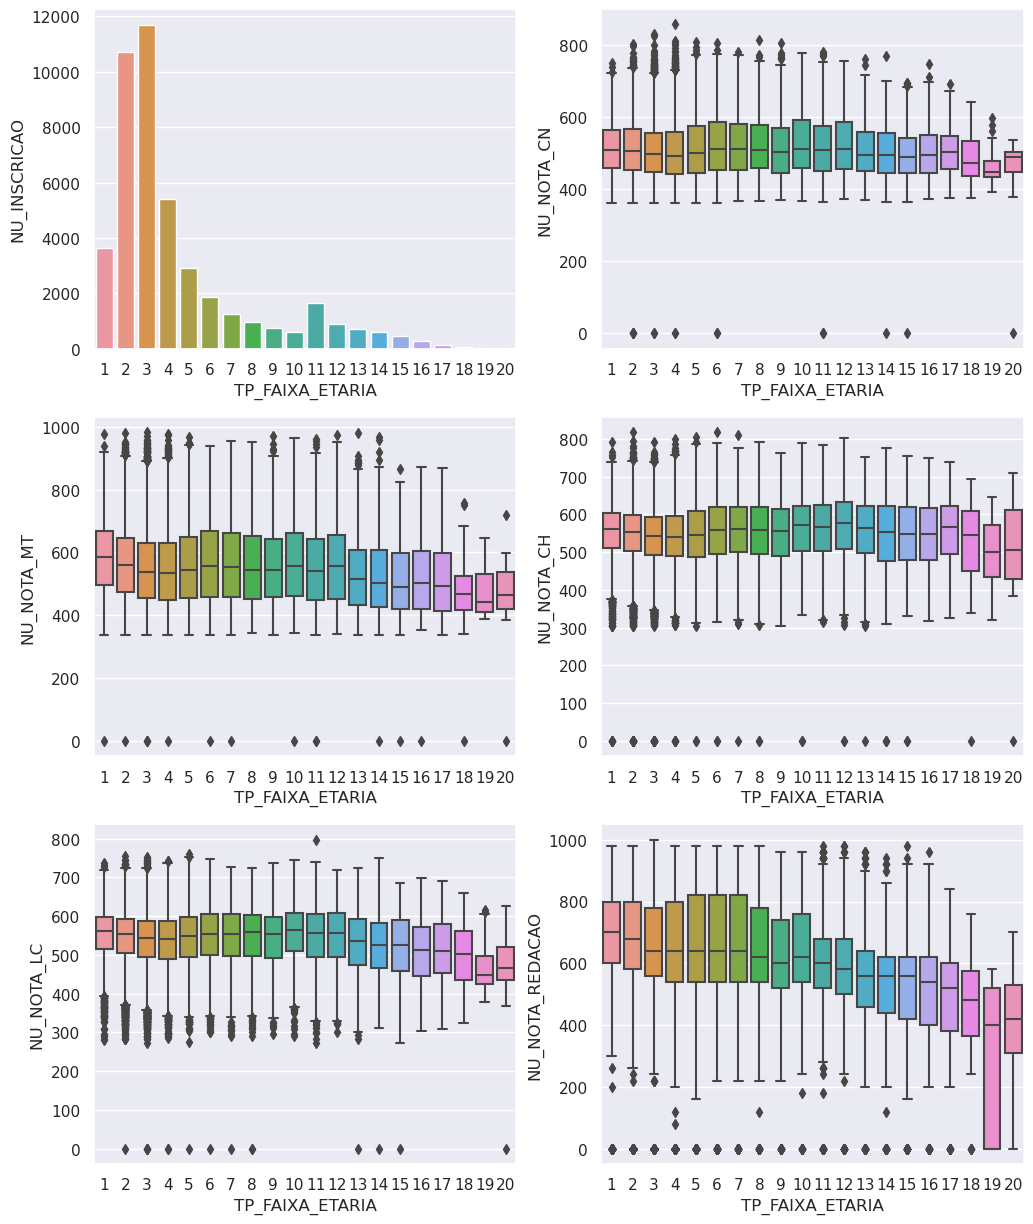

In [7]:
plot_variable('TP_FAIXA_ETARIA')

the next set of graphics shows the behaviour of the category TP_SEXO (sex). As we can see, in this year, the median of the grades of the male candidaates are slitily bigger than the grades of female candidates in the grades NU_NOTA_CN, NU_NOTA_MT, NU_NOTA_CH, NU_NOTA_LC. On the other hand, the grade of NU_NOTA_REDACAO is bigger for female.

In [8]:
dicTP_SEXO = {'F':1, 'M':0}
data_DF['TP_SEXO']=data_DF['TP_SEXO'].map(dicTP_SEXO)

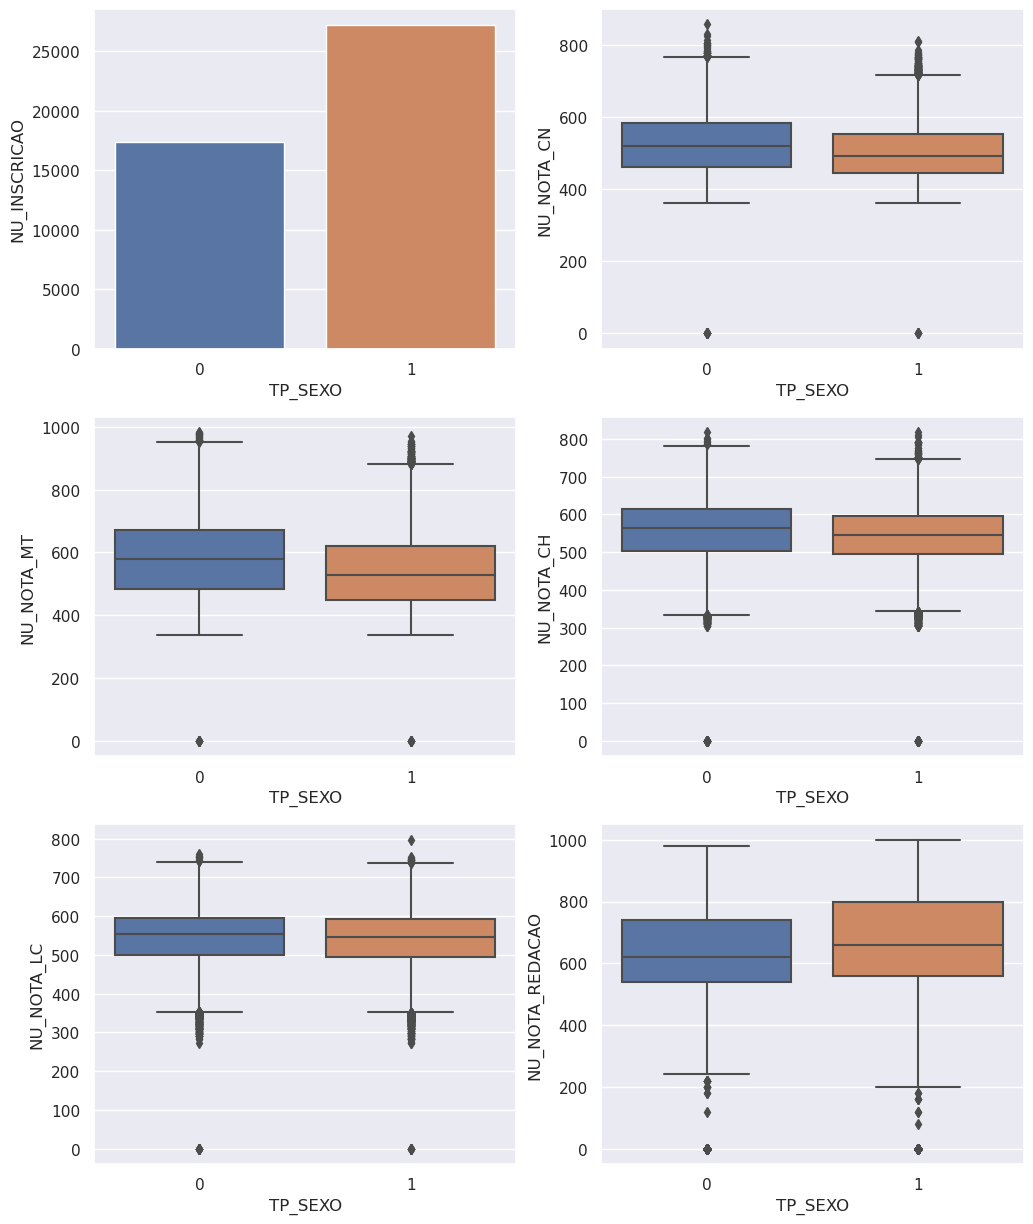

In [9]:
plot_variable('TP_SEXO')

In the set of graphics bolow, we analize the column TP_ESTADO_CIVIL (marital status) of the candidates and their performance on ENEM. As we can see, the majority of candidates are single (group 1). The medians of all the the groups are similar except for the group of widower that has the worse performance.

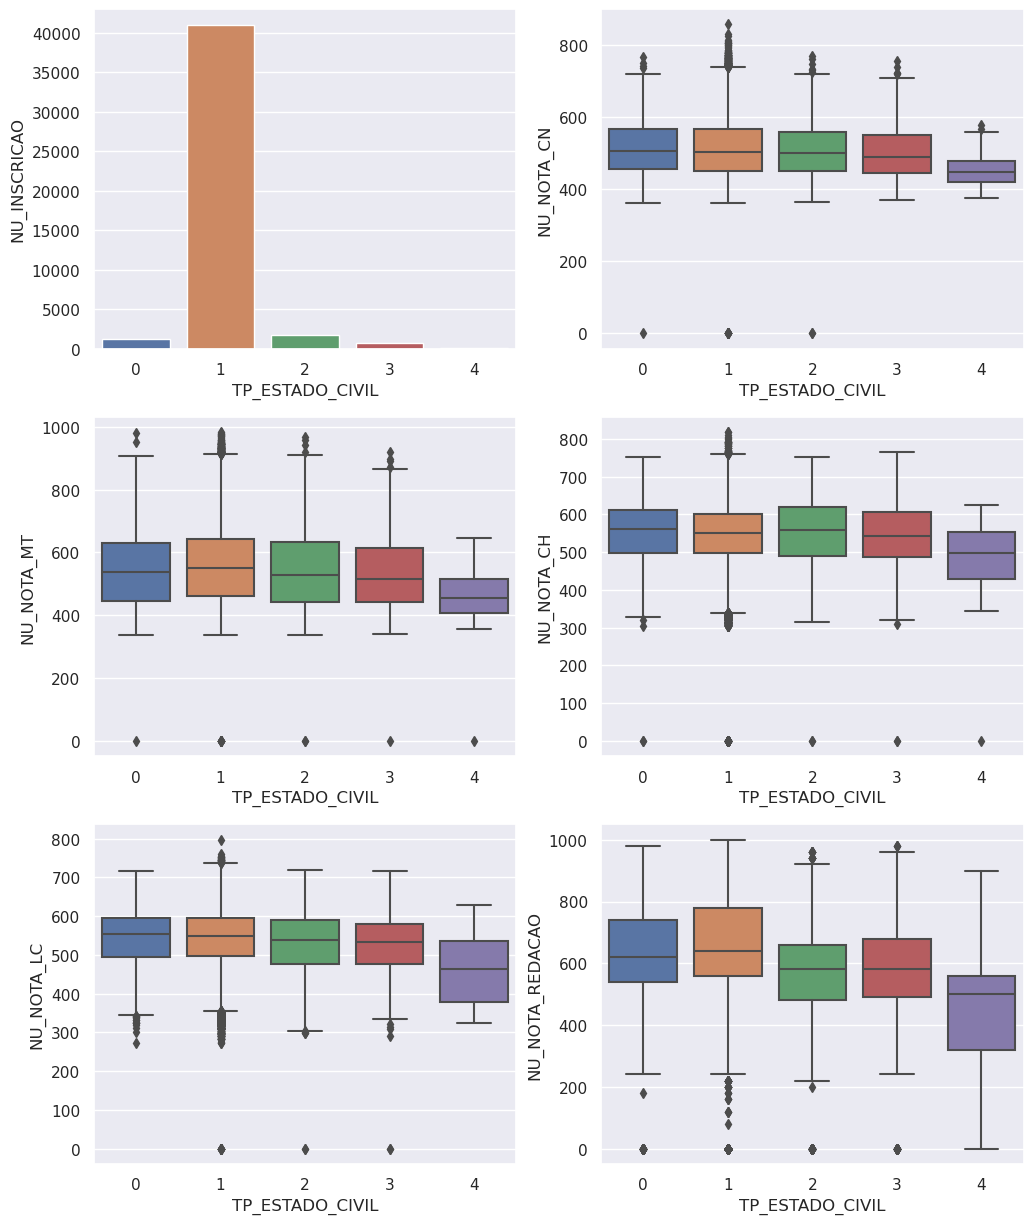

In [10]:
plot_variable('TP_ESTADO_CIVIL')

In the set of graphics below, column TP_COR_RACA (etnicity), most of the candidates are white (group 1) or mixed race (group 3). The subsequent tables shows how the cathegories of etnicity performs in each test. In general, the groups that performed better are group 1 (white) and group 0 (that didn't answer the question). The group that did worse on the test was group 5 (indians).

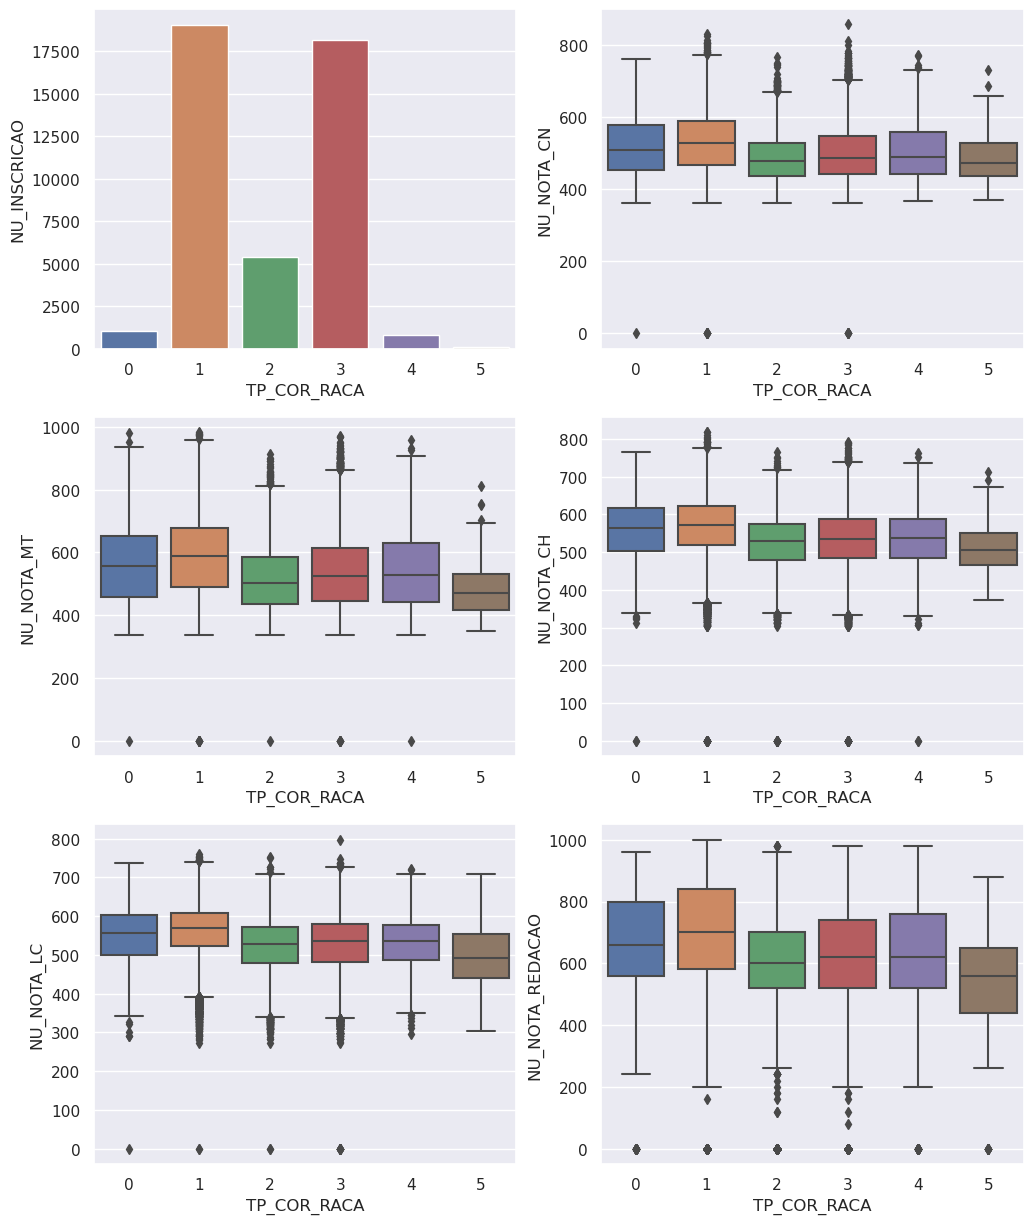

In [11]:
plot_variable('TP_COR_RACA')

In the next group of graphycs, we analyse the kind of high school (public or private) that the students have atended. As we can see, most of the students didn't answer the question making group 1 the biggest. The second biggest group is the group that atended public school (group 2) and the tird - the smallest group - that is the one that atended private school. As we can see, the group that atend private school get the biggest median in all grades that ENEM analises.

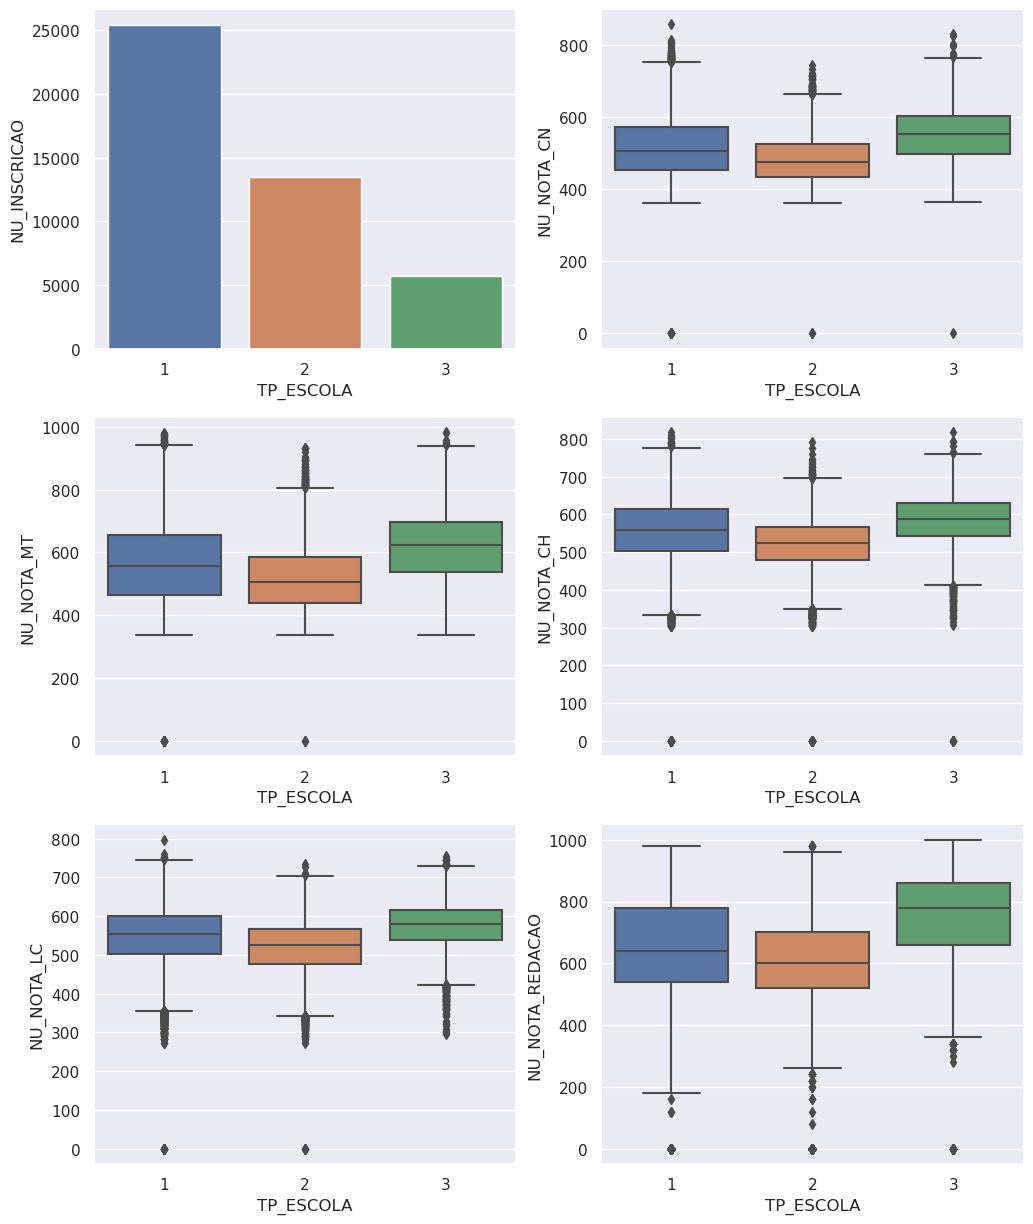

In [12]:
plot_variable('TP_ESCOLA')

In the set of graphics below, the majority of the candidates are not trainee (group 1), although there isn't a great difference between the median of the grades of trainee or not trainee.

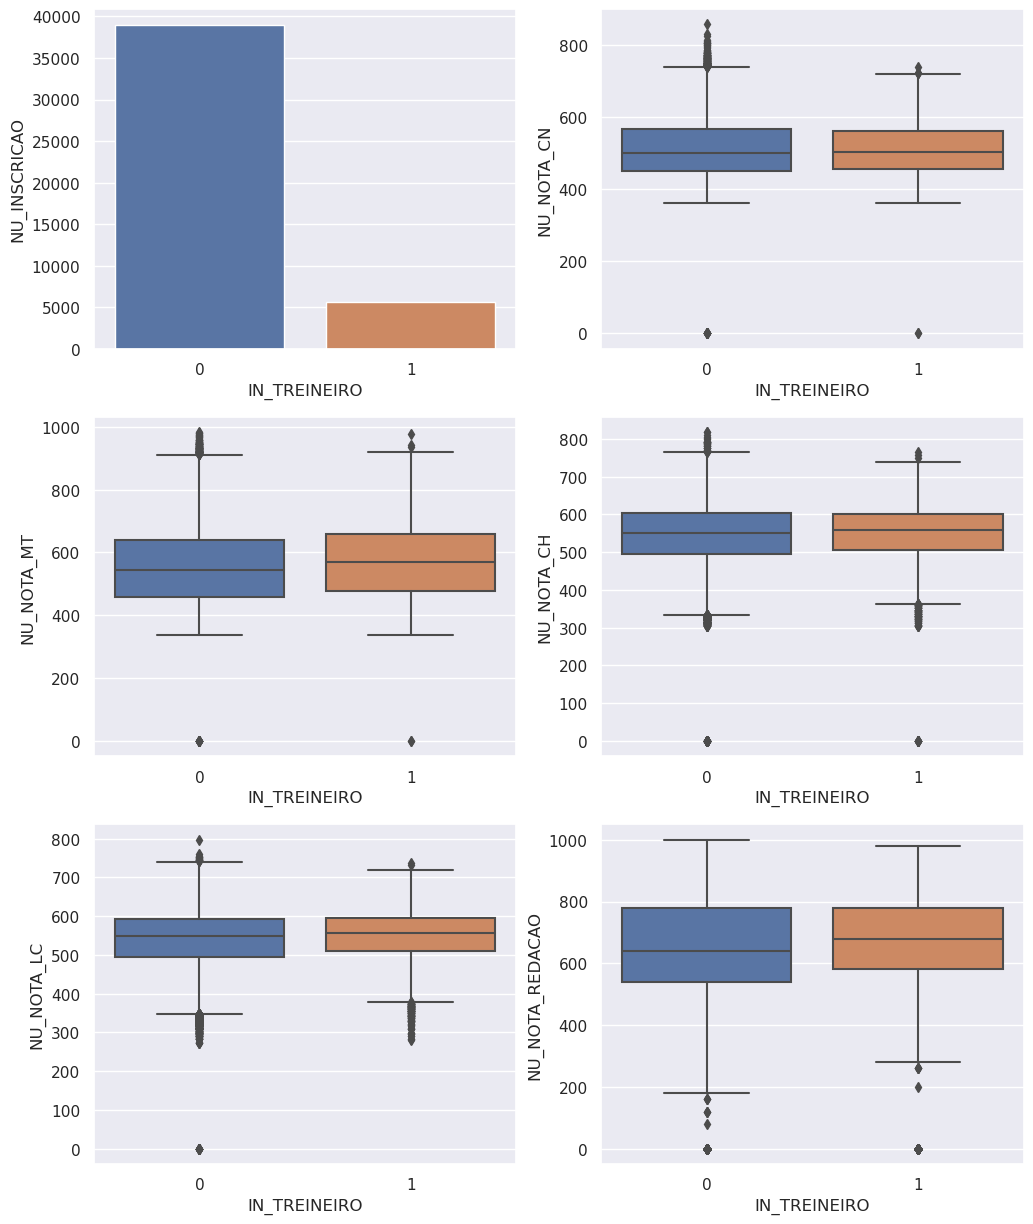

In [13]:
plot_variable('IN_TREINEIRO')

The next set of graphycs shows the educationl level of the father of the candidate. Most of the candidates belong to cathegory E (group 5), the father completed high school but did not go to college. The graphycs show a tendency for the grades to encrise with the level of education of the father.

In [14]:
# Here we rename our categories using numbers in place of letters, this way the boxplot will
# be organized from the smoller to the biggest number

dicQ001 = {
    'A': 1, 'B':2, 'C':3, 'D':4, 'E':5, 'F':6, 'G':7, 'H':0
}

data_DF.Q001=data_DF.Q001.map(dicQ001)

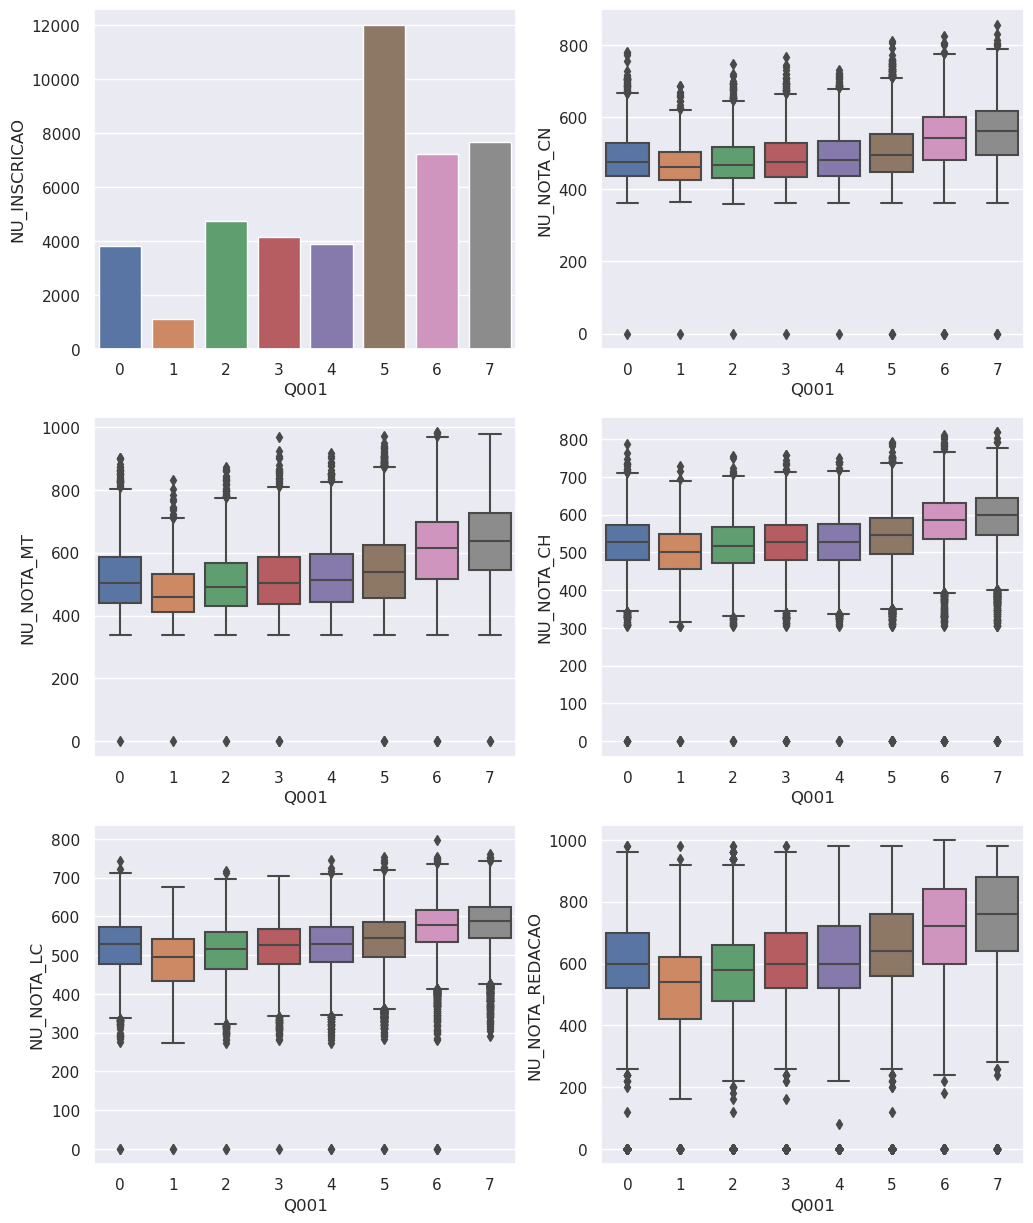

In [15]:
plot_variable('Q001')

The next set of graphycs shows the  educationl level of the mother of the candidate, as we can see, most part of the candidates belong two cathegory E (group 5), the mother completed high school but did not go to college. The graphycs show a tendency for the grades to encrease with the level of education of the mother.

In [16]:
# Here we rename our categories using numbers in place of letters, this way the boxplot will
# be organized from the smoller to the biggest number

dicQ002 = {
    'A': 1, 'B':2, 'C':3, 'D':4, 'E':5, 'F':6, 'G':7, 'H':0
}

data_DF.Q002=data_DF.Q002.map(dicQ002)

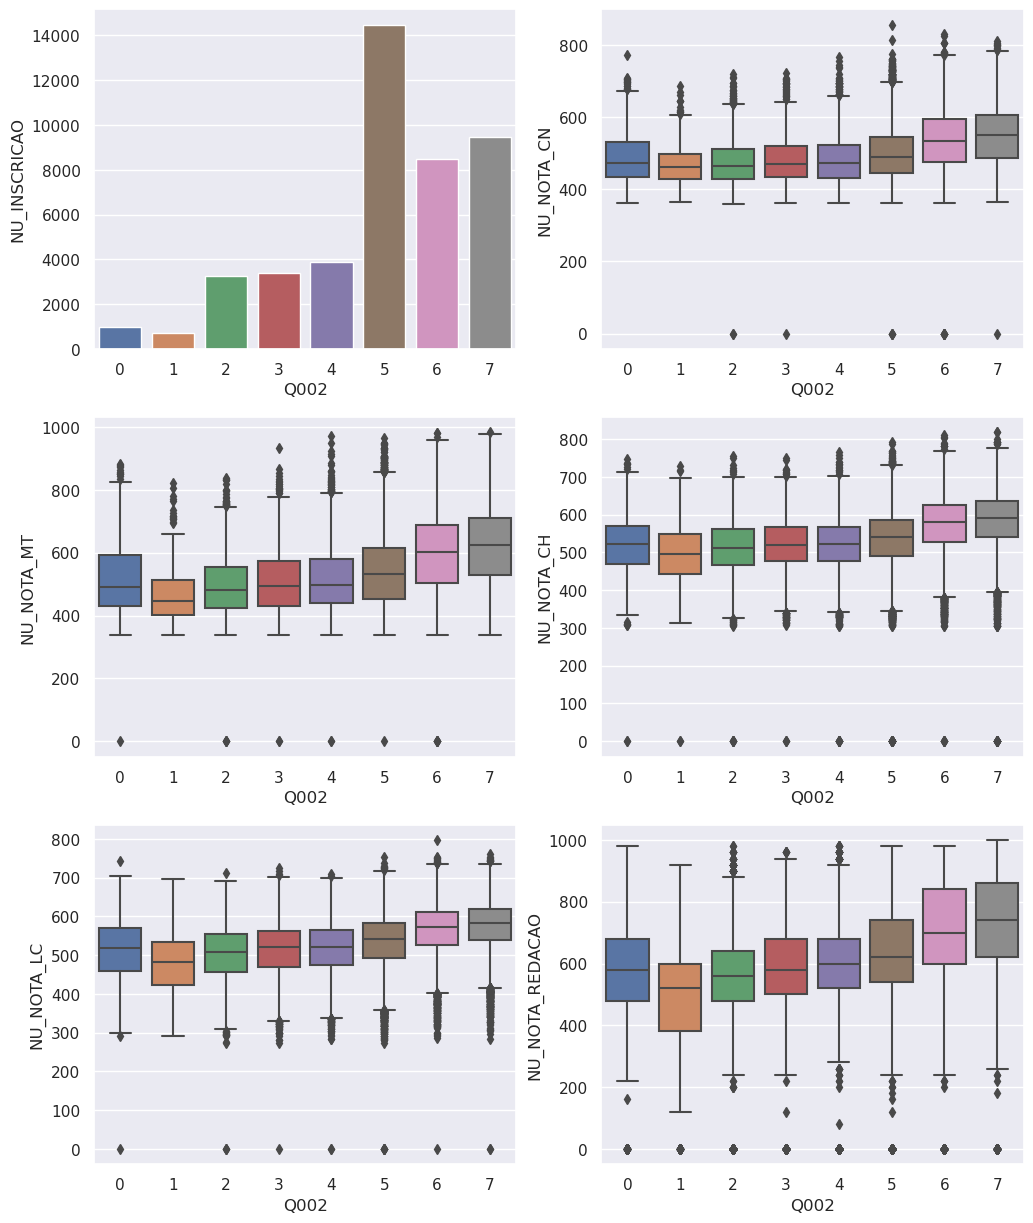

In [17]:
plot_variable('Q002')

The graphics below shows how the parameter monthly income influences the grades of the students. As we can see, most of the candidates that atends the ENEM have monthly income in the categories B (group 2), C (group 3), D (group 4). That means a monthly income smoller than R$ 2424,00. We also see that he median of the grades at enem grows with the growth of monthly income in all categories of grades.

In [18]:
# Here we rename our categories using numbers in place of letters, this way the boxplot will
# be organized from the smoller to the biggest number

dicQ006 = {
    'A': 1, 'B':2, 'C':3, 'D':4, 'E':5, 'F':6, 'G':7, 'H':8, 'I':9, 'J':10, 'K':11, 'L':12,
    'M':13, 'N':14, 'O':15, 'P':16, 'Q':17
}

data_DF.Q006=data_DF.Q006.map(dicQ006)

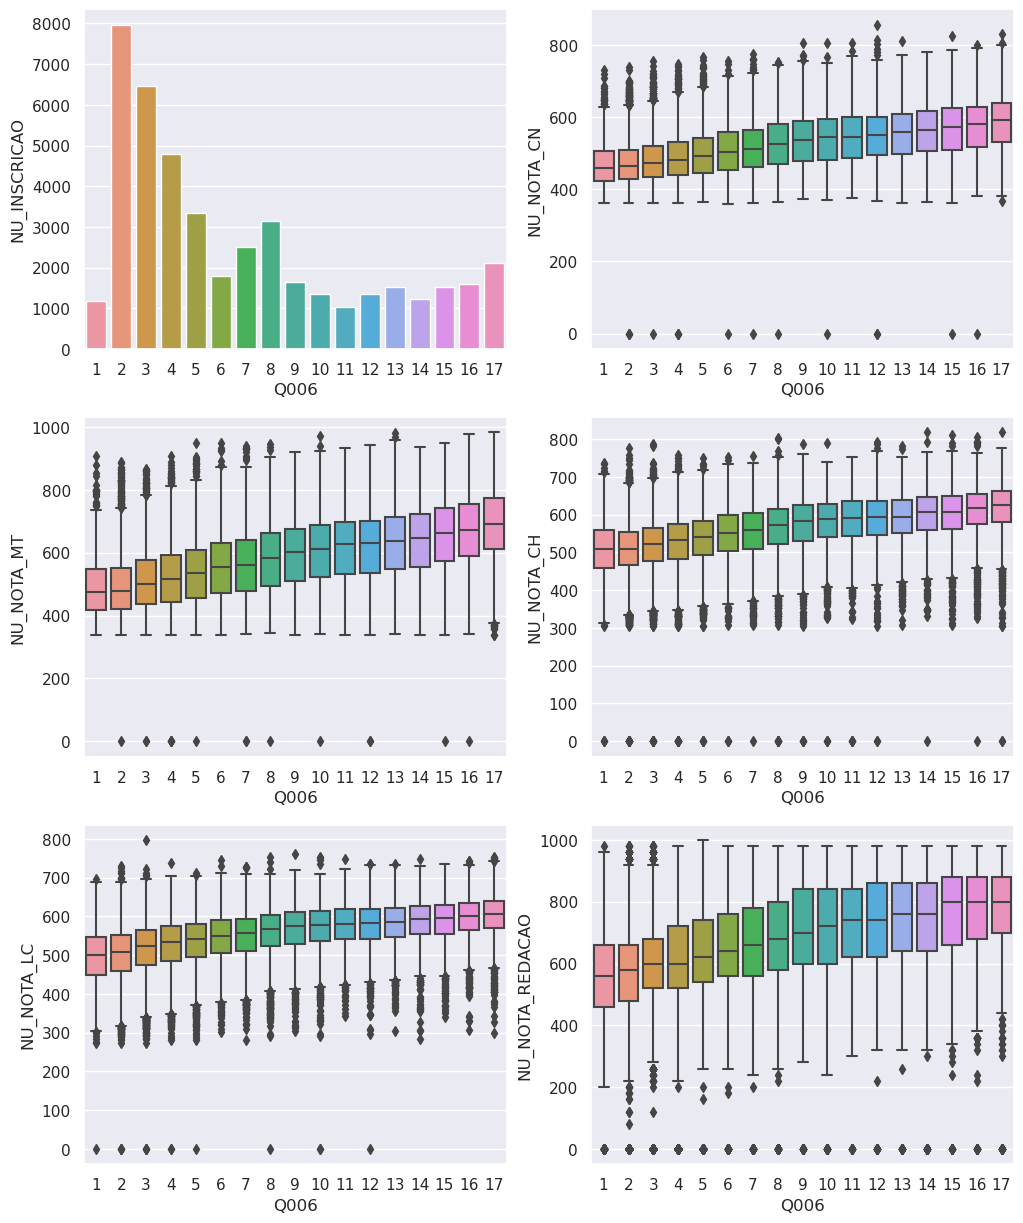

In [19]:
plot_variable('Q006')

Another variable that we consider that can influence the grades of the candidates are the acess to the internet. As we have to years of online school (2020 and 2021). The group of graphycs below show that the majority of the candidates have acess to the internet but the fewers candidates that don't have this acess performed worse in enem 2022.

In [20]:
dicQ025 = {'A':0, 'B':1}
data_DF.Q025=data_DF.Q025.map(dicQ025)

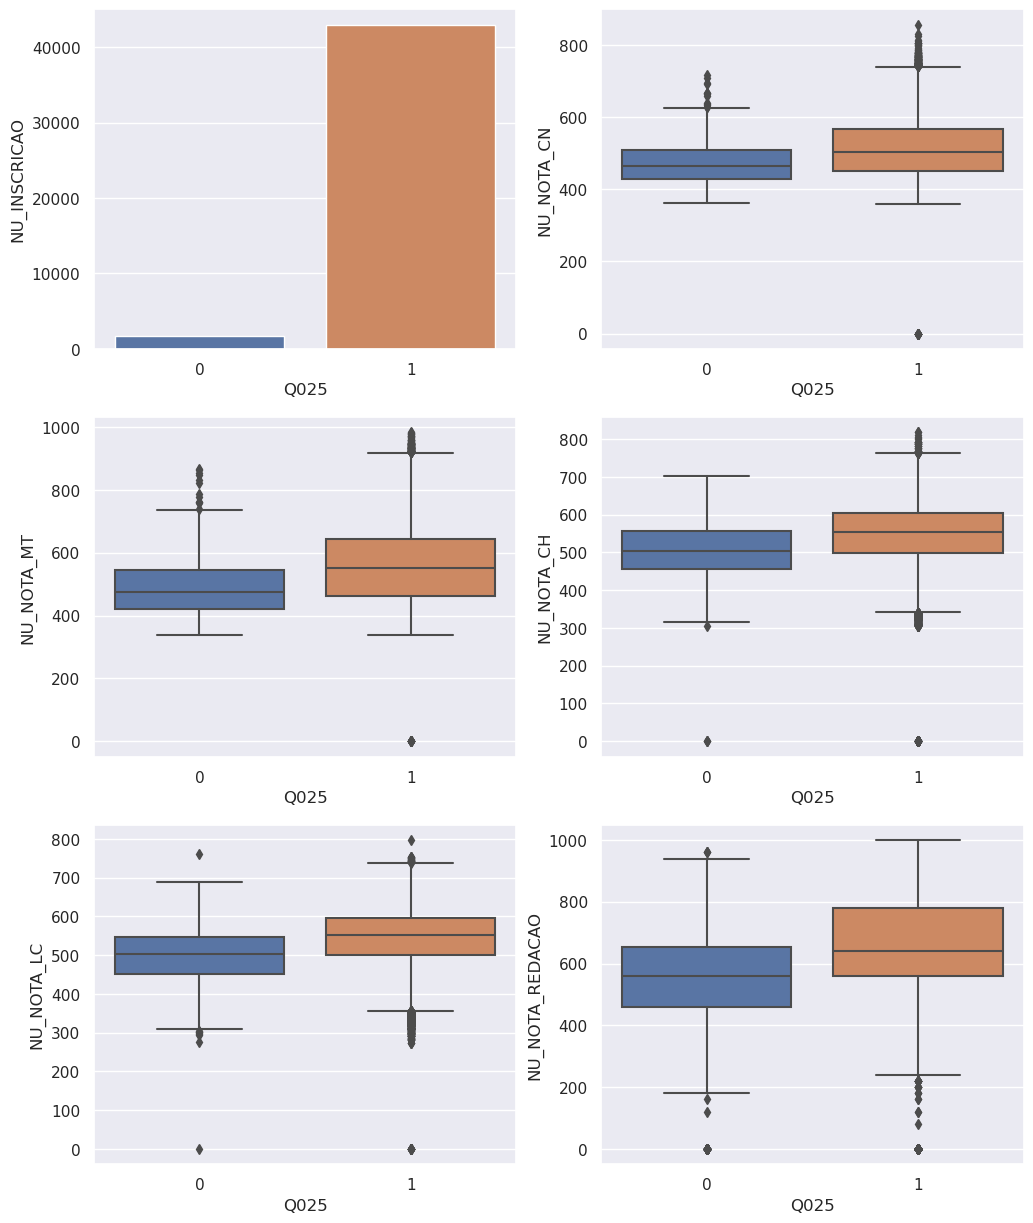

In [21]:
plot_variable('Q025')